In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fr=3
list1=['A','B','C','D','E']
list2=[]
for i in list1:
    for j in list1:
        for k in list1:
            list2.append(i+j+k)        
# list2

In [6]:
c1=0
c2=0
for i in range(len(list2)):
    if list2[i][0]==list2[i][1] or list2[i][0]==list2[i][2] or list2[i][1]==list2[i][2]:
        c1+=1
    if list2[i][0]!=list2[i][1] and list2[i][0]!=list2[i][2] and list2[i][1]!=list2[i][2]:
        c2+=1
        
prob1=c1/len(list2)
prob2=c2/len(list2)


In [7]:
plot1=[prob1,prob2]

Text(0, 0.5, 'Probability')

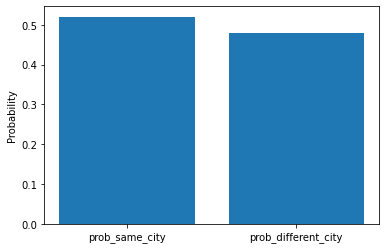

In [8]:
city=['prob_same_city','prob_different_city']
plt.bar(city,plot1)
plt.ylabel("Probability")

In [9]:
df=pd.read_csv("Housing.csv")
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


In [10]:
#stats
price_mean=df["price"].mean()
price_median=df["price"].median()
price_std=df["price"].std()

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm

c=['price', 'area', 'length', 'width', 'bedrooms', 'bathrooms', 'stories','mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'parking', 'prefarea','furnishingstatus']
df[c]=df[c].apply(preprocessing.LabelEncoder().fit_transform)
X=df.drop('furnishingstatus',axis=1)
y=df['furnishingstatus']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=24)
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [15]:
accuracy_score(y_test,y_pred)*100

40.243902439024396

In [16]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(X)
scalar.transform(X)

array([[ 0.99156103, -0.3725415 ,  0.37126576, ...,  1.4726183 ,
         1.51769249,  1.80494113],
       [ 1.67802636,  1.01688766,  1.27826564, ...,  1.4726183 ,
         2.67940935, -0.55403469],
       [ 1.04876647,  0.97864649, -0.23011459, ..., -0.67906259,
         1.51769249,  1.80494113],
       ...,
       [-1.48098539, -1.19472664, -1.13711446, ..., -0.67906259,
        -0.80574124, -0.55403469],
       [-0.41315043,  0.90216415,  0.25296143, ..., -0.67906259,
        -0.80574124, -0.55403469],
       [ 1.13139656,  1.10611705, -0.0329407 , ..., -0.67906259,
        -0.80574124, -0.55403469]])

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=24)
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.4024390243902439

In [19]:
X

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,428,213,205,75,3,1,2,1,0,0,0,1,2,1
1,536,431,297,158,3,3,3,1,0,0,0,1,3,0
2,437,425,144,311,2,1,1,1,0,1,0,0,2,1
3,365,298,59,303,3,1,1,1,0,1,0,1,3,1
4,263,157,147,94,3,0,1,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,46,100,122,67,1,0,0,1,0,1,0,0,2,0
541,94,202,143,126,2,0,0,0,0,0,0,0,0,0
542,39,84,52,127,1,0,0,1,0,0,0,0,0,0
543,207,413,193,233,2,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

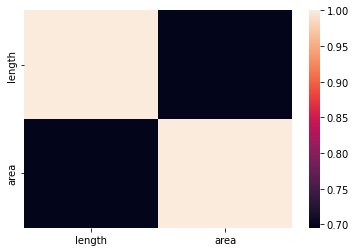

In [22]:
tdf=df[['length','area']]
tdf=tdf.corr()
sns.heatmap(tdf)

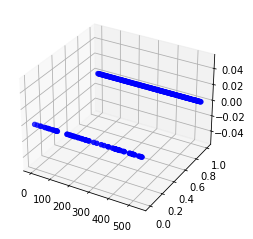

In [26]:
x=df['area']
y=df['mainroad']
z=df['bathrooms']
fig=plt.figure()
x1 =fig.add_subplot(projection='3d')
x1.scatter(x, y, c='b')
plt.show()

<BarContainer object of 545 artists>

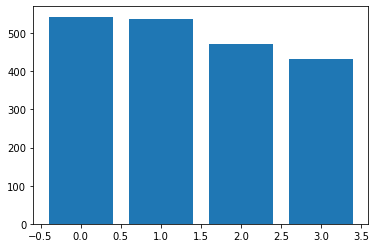

In [27]:
plt.bar(z,x)